In [15]:
import numpy as np
import pandas as pd
import seaborn as sns

In [16]:
df = pd.read_csv("kidney-stone-dataset.csv")


In [17]:
labels = df.columns
print(labels)

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')


In [18]:
df.set_index('id', inplace=True)

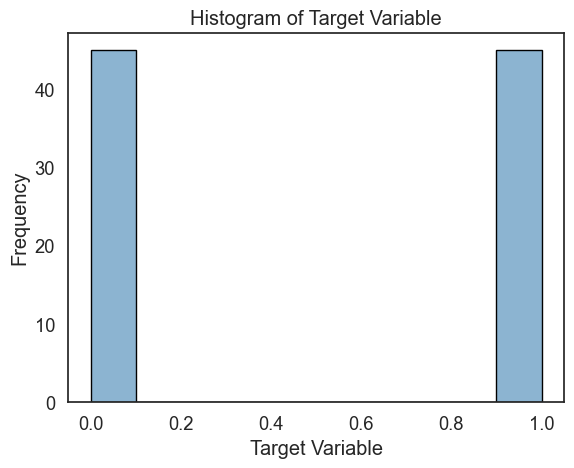

In [19]:
import matplotlib.pyplot as plt
target_variable = df['target']
plt.hist(target_variable, bins=10, edgecolor='black')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable')
plt.show() # 0 no stone 1 stone

In [20]:
from sklearn.metrics import roc_auc_score
test =df.drop(columns=['target'])
new_df = df[['target']].copy()
for f in test.columns:
    print(f"AUC with {f} only : {roc_auc_score(df['target'], df[f]):.4f}") #area under roc curve 

AUC with gravity only : 0.7084
AUC with ph only : 0.4440
AUC with osmo only : 0.5835
AUC with cond only : 0.5156
AUC with urea only : 0.5919
AUC with calc only : 0.7474


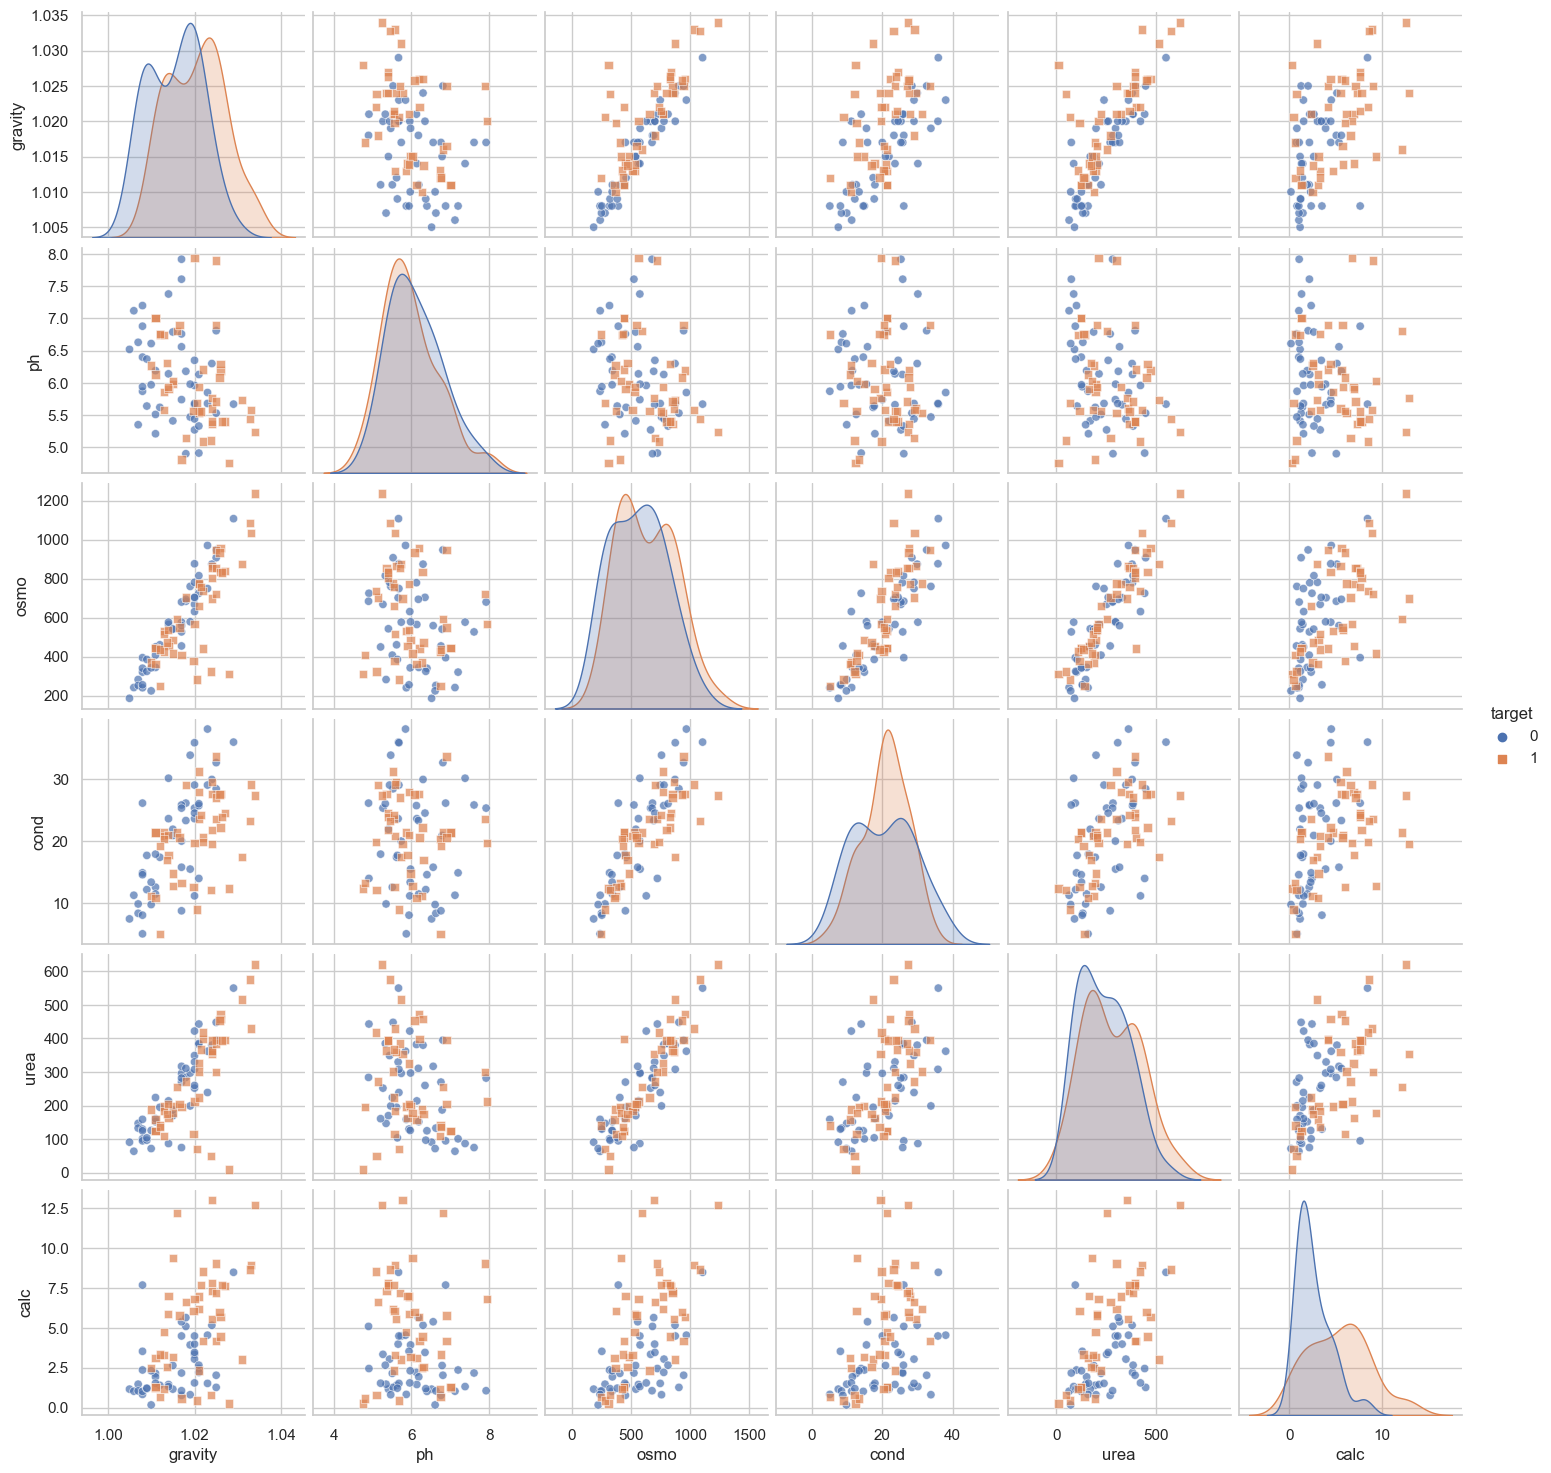

In [21]:
sns.set(style='whitegrid')
sns.pairplot(df, hue='target', diag_kind='kde', markers=['o', 's'], plot_kws={'alpha': 0.7})
plt.show()
# df.head() from the pairplot we can see how feautures differe in the results kde plot is like a gaussian curve histogram
#ph doesn't change that much

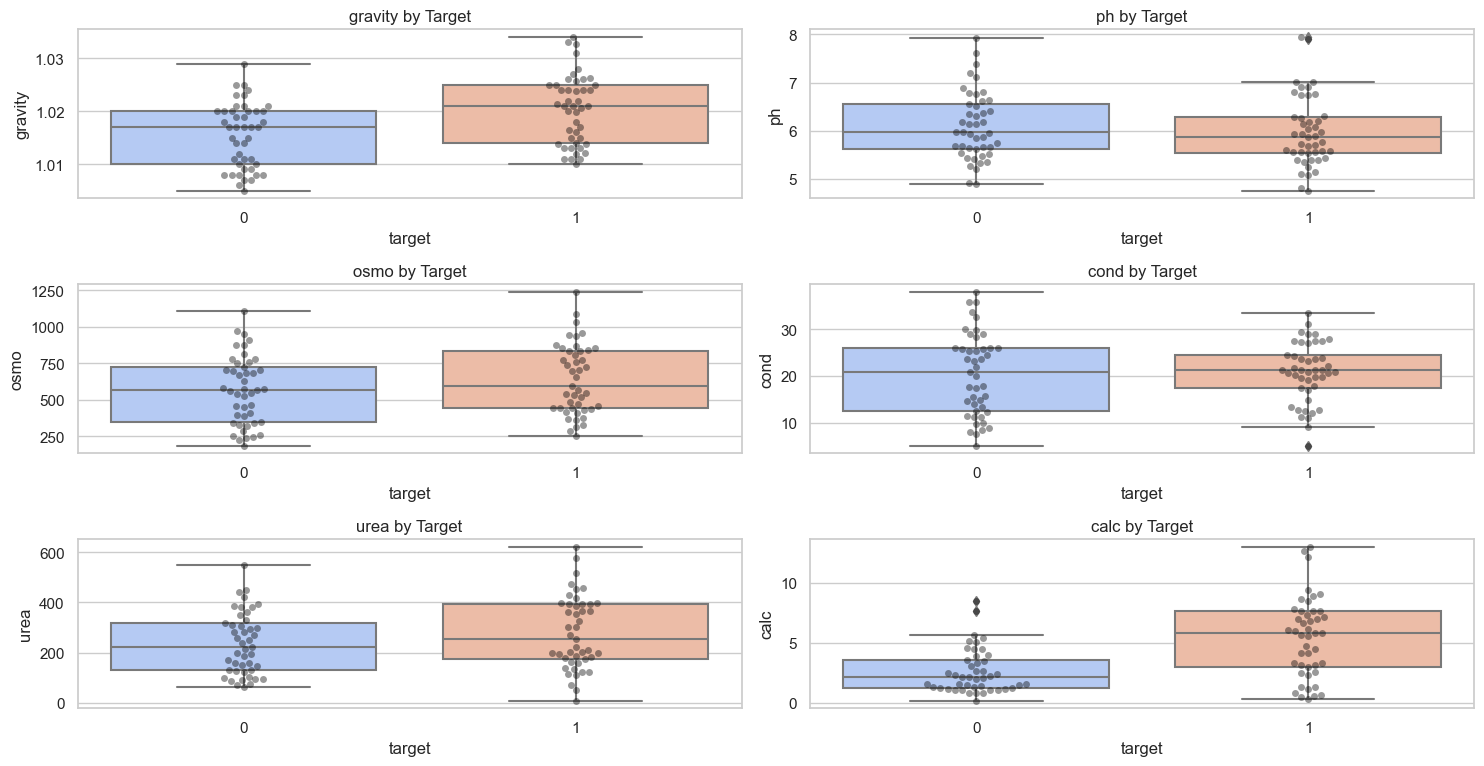

In [22]:
data_without_target = df.drop(columns=['target'])

plt.figure(figsize=(15, 15))
for i, column in enumerate(data_without_target.columns):
    plt.subplot(len(data_without_target.columns), 2, i + 1)
    sns.boxplot(x='target', y=column, data=df, palette='coolwarm')
    sns.swarmplot(x='target', y=column, data=df, color='black', alpha=0.4)
    plt.title(f'{column} by Target')
plt.tight_layout()
plt.show() #box plots that shows 50% of the feauture values and where they stand and compare between them 

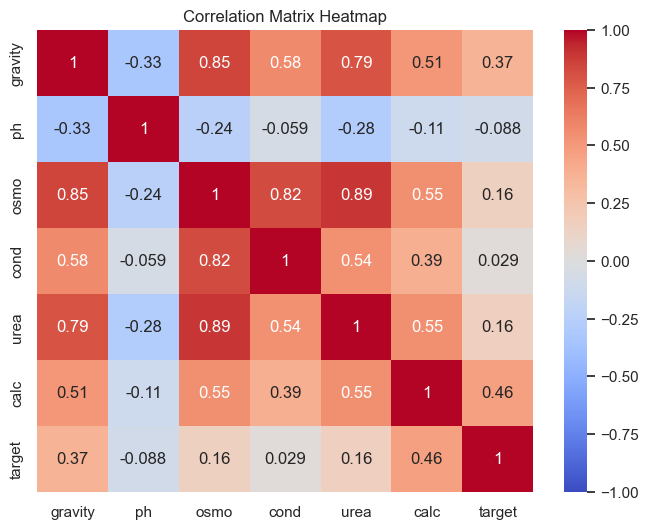

In [23]:
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()








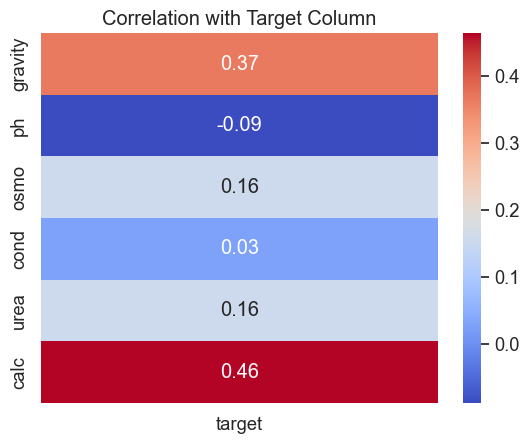

In [9]:
corr = df.corr()

# extract the correlations with the target column
target_corr = corr['target'].drop('target')

# create a heatmap of the correlations with the target column
sns.set(font_scale=1.2)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Target Column')
plt.show()

In [10]:
# from the correlation matrix ph and conductivity don't contribute that much independently

In [11]:
from sklearn.model_selection import train_test_split
columns_to_drop = ['ph','cond']
df = df.drop(columns_to_drop, axis=1)   #not necessary 
X_train, X_test, y_train, y_test = train_test_split(df, new_df, test_size=0.30, random_state=30)
df.head()

,gravity,ph,osmo,cond,urea,calc,target
id,,,,,,,
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

# Create the GridSearchCV instance

# Fit the grid search to the training data
rf.fit(X_train, y_train)

# Print the best parameters found by grid search

# Get the best estimator from the grid search

# Make predictions on the test data using the best model
predictions = rf.predict(X_test)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


C:\Users\moham\AppData\Local\Temp\ipykernel_18176\2125998287.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


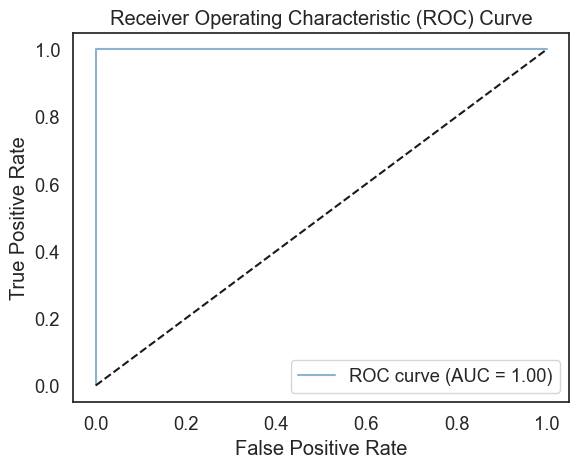

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Calculate the area under the ROC curve (AUC)
roc_auc = roc_auc_score(y_test, predictions)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [28]:
columns_to_drop = ['ph','cond']
df = df.drop(columns_to_drop, axis=1)   #not necessary 
X_train, X_test, y_train, y_test = train_test_split(df, new_df, test_size=0.30, random_state=30)
df.head()

,gravity,osmo,urea,calc,target
id,,,,,
0,1.021,725,443,2.45,0
1,1.017,577,296,4.49,0
2,1.008,321,101,2.36,0
3,1.011,408,224,2.15,0
4,1.005,187,91,1.16,0


Accuracy: 1.0


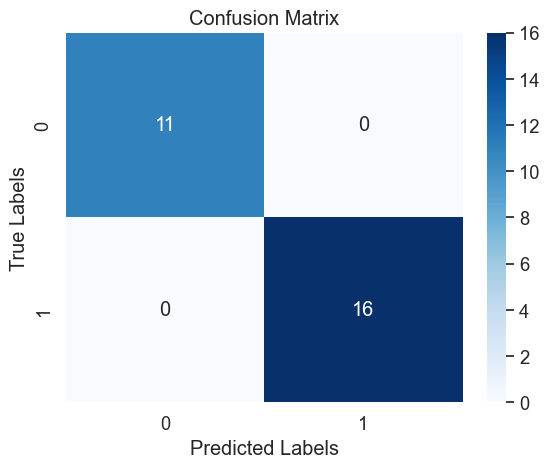

In [14]:
# rf = RandomForestClassifier()

# # Create the GridSearchCV instance

# # Fit the grid search to the training data
# rf.fit(X_train, y_train)

# # Print the best parameters found by grid search

# # Get the best estimator from the grid search

# # Make predictions on the test data using the best model
# predictions = rf.predict(X_test)

# # Evaluate the accuracy of the best model
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the accuracy of the MLP classifier
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
# y_pred
cm = confusion_matrix(y_test, predictions)

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()